In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
white_wine=pd.read_csv('winequality-white.csv', sep=';')
red_wine=pd.read_csv('winequality-red.csv',sep=';')
white_wine=white_wine.drop_duplicates()
red_wine=red_wine.drop_duplicates()

In [3]:
def outliers_idr(df):
    
    num=df.count(axis=1)
    num_col=num[1]
    Q1=np.zeros((1,num_col))
    Q3=np.zeros((1,num_col))
    IQR=np.zeros((1,num_col))
    i=0
    for column in df:

        Q1[0,i] = df[column].quantile(0.25)
        Q3[0,i] = df[column].quantile(0.75)
        IQR[0,i]=Q3[0,i]-Q1[0,i]

        df_out= df[(df[column] <= (Q3[0,i]+(IQR[0,i]*2.5))) & (df[column] >= (Q1[0,i]-(IQR[0,i]*2.5)))]
        df=df_out
        i=i+1
    return df_out



df_r= outliers_idr(red_wine)

df_r.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1179 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1179 non-null   float64
 1   volatile acidity      1179 non-null   float64
 2   citric acid           1179 non-null   float64
 3   residual sugar        1179 non-null   float64
 4   chlorides             1179 non-null   float64
 5   free sulfur dioxide   1179 non-null   float64
 6   total sulfur dioxide  1179 non-null   float64
 7   density               1179 non-null   float64
 8   pH                    1179 non-null   float64
 9   sulphates             1179 non-null   float64
 10  alcohol               1179 non-null   float64
 11  quality               1179 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 119.7 KB


In [4]:
df_w=outliers_idr(white_wine)
white_wine.info()
df_w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3961 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 531.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3684 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column        

In [5]:
# removing outlier using zscore:
# in this method abs(z_score) = abs((y - mean_1)/std_1 ) is higher than 3. That means that only data 
# (-3*std, 3*std) are considered (99% confidence interval)
from scipy import stats
white_wine[(np.abs(stats.zscore(white_wine)) < 3).all(axis=1)]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.99380,3.22,0.45,11.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


/var/folders/nm/btrww2_94pncl34mb0yt49j80000gn/T/ipykernel_46057/77103894.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_wine=df_r.append(df_w)


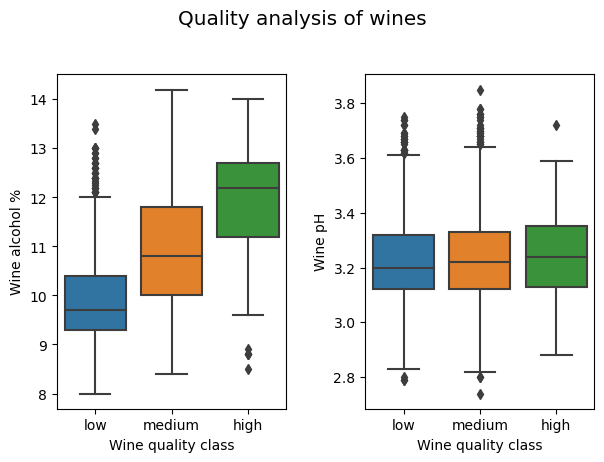

In [6]:
total_wine=df_r.append(df_w)
total_wine['quality_lable']=total_wine['quality'].apply(lambda x : 'low' if x <= 5 else 'medium' if x <= 7 else 'high')
total_wine['quality_lable']=pd.Categorical(total_wine['quality_lable'], categories=['low', 'medium', 'high'])
fig = plt.figure()
st = fig.suptitle("Quality analysis of wines", fontsize="x-large")


ax1=plt.subplot2grid((1,2),(0,0))

sns.boxplot(x='quality_lable', y='alcohol', data=total_wine).set(xlabel='Wine quality class',
ylabel='Wine alcohol %')
ax2=plt.subplot2grid((1,2),(0,1))

sns.boxplot(x='quality_lable', y='pH', data=total_wine). set(xlabel='Wine quality class',
ylabel='Wine pH')

# controls the space between subplots
fig.tight_layout(pad=2.0)

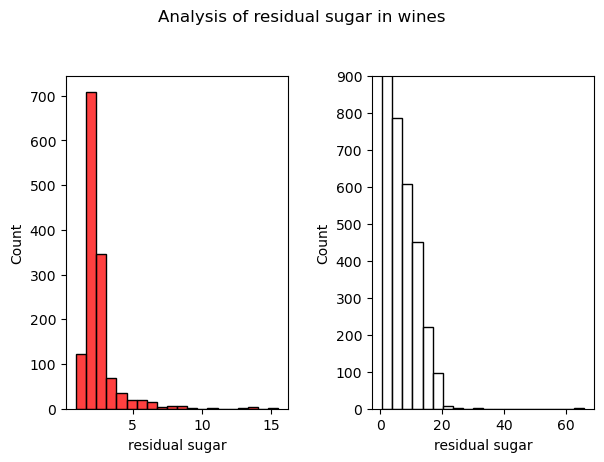

In [12]:
fig=plt.figure()
str=plt.suptitle('Analysis of residual sugar in wines')
ax1=plt.subplot2grid((1,2),(0,0))
sns.histplot(red_wine['residual sugar'],bins=20, color='red', edgecolor= 'black', linewidth=1.0)
ax2=plt.subplot2grid((1,2),(0,1))

sns.histplot(white_wine['residual sugar'], bins=20,color='white', edgecolor='black', linewidth=1.0)
plt.ylim(0,900)
fig.tight_layout(pad=2)

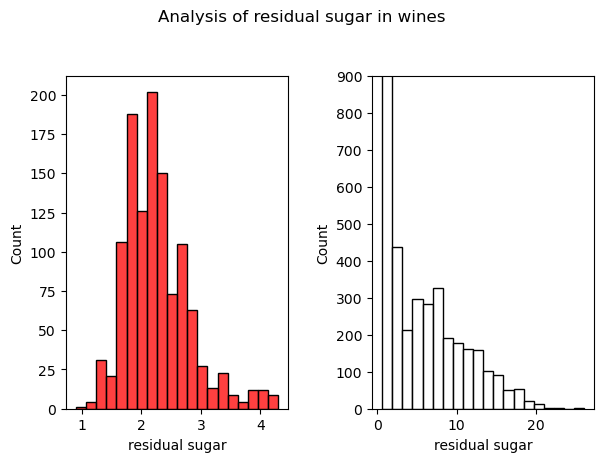

In [7]:
fig=plt.figure()
str=plt.suptitle('Analysis of residual sugar in wines')
ax1=plt.subplot2grid((1,2),(0,0))
sns.histplot(df_r['residual sugar'],bins=20, color='red', edgecolor= 'black', linewidth=1.0)
ax2=plt.subplot2grid((1,2),(0,1))

sns.histplot(df_w['residual sugar'], bins=20,color='white', edgecolor='black', linewidth=1.0)
plt.ylim(0,900)
fig.tight_layout(pad=2)

In [57]:
white_wine=white_wine.drop_duplicates()
Q1_w = white_wine['fixed acidity'].quantile(0.25)
Q3_w = white_wine['fixed acidity'].quantile(0.75)
IQR_w=Q3_w-Q1_w
print(IQR_w)
white_wine_without_outliers= white_wine[(white_wine['fixed acidity'] <= (Q3_w+(IQR_w*1.5))) & 
(white_wine['fixed acidity'] >= (Q1_w-(IQR_w*1.5))) ]
white_wine_without_outliers
red_wine=red_wine.drop_duplicates()
Q1_r = red_wine['fixed acidity'].quantile(0.25)
Q3_r = red_wine['fixed acidity'].quantile(0.75)
IQR_r=Q3_r-Q1_r

red_wine_without_outliers= red_wine[(red_wine['fixed acidity'] <= (Q3_r+(IQR_r*1.5))) & 
(red_wine['fixed acidity'] >= (Q1_r-(IQR_r*1.5))) ]
red_wine_without_outliers.info()

1.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1318 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1318 non-null   float64
 1   volatile acidity      1318 non-null   float64
 2   citric acid           1318 non-null   float64
 3   residual sugar        1318 non-null   float64
 4   chlorides             1318 non-null   float64
 5   free sulfur dioxide   1318 non-null   float64
 6   total sulfur dioxide  1318 non-null   float64
 7   density               1318 non-null   float64
 8   pH                    1318 non-null   float64
 9   sulphates             1318 non-null   float64
 10  alcohol               1318 non-null   float64
 11  quality               1318 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 133.9 KB


In [58]:
df_r.info()
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1179 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1179 non-null   float64
 1   volatile acidity      1179 non-null   float64
 2   citric acid           1179 non-null   float64
 3   residual sugar        1179 non-null   float64
 4   chlorides             1179 non-null   float64
 5   free sulfur dioxide   1179 non-null   float64
 6   total sulfur dioxide  1179 non-null   float64
 7   density               1179 non-null   float64
 8   pH                    1179 non-null   float64
 9   sulphates             1179 non-null   float64
 10  alcohol               1179 non-null   float64
 11  quality               1179 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 119.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column        

In [59]:
z=np.zeros((1,5))
z.shape
z[0,1]=2
z

array([[0., 2., 0., 0., 0.]])

/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='quality_lable'>

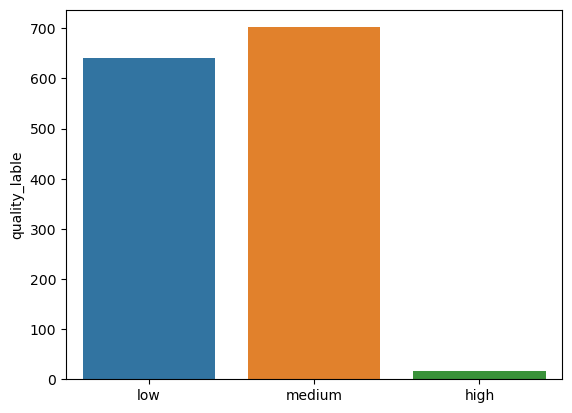

In [8]:
red_wine['quality_lable']=red_wine['quality'].apply(lambda x : 'low' if x <= 5 else 'medium' if x <= 7 else 'high')
# here we are transforming these labels into categrical data type (specific to pandas) instead of simple st
red_wine['quality_lable']=pd.Categorical(red_wine['quality_lable'], categories=['low', 'medium', 'high'])
sns.barplot( red_wine['quality_lable'].value_counts().index, red_wine['quality_lable'].value_counts())


/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_lable
267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,8,high
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8,high
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8,high
481,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,8,high
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8,high
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,high
828,7.8,0.57,0.09,2.3,0.065,34.0,45.0,0.99417,3.46,0.74,12.7,8,high
1061,9.1,0.40,0.50,1.8,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,8,high
1090,10.0,0.26,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,8,high
1120,7.9,0.54,0.34,2.5,0.076,8.0,17.0,0.99235,3.20,0.72,13.1,8,high


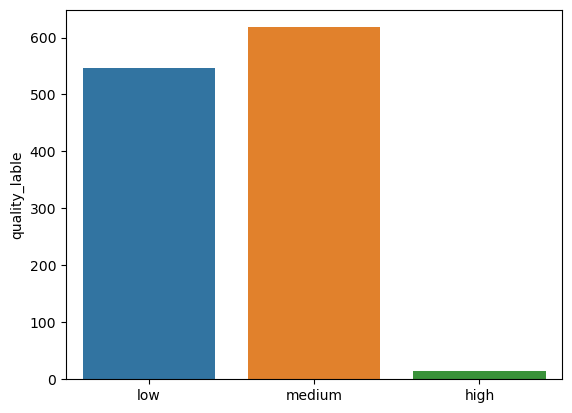

In [10]:
df_r['quality_lable']=df_r['quality'].apply(lambda x : 'low' if x <= 5 else 'medium' if x <= 7 else 'high')
# here we are transforming these labels into categrical data type (specific to pandas) instead of simple st
df_r['quality_lable']=pd.Categorical(df_r['quality_lable'], categories=['low', 'medium', 'high'])
sns.barplot( df_r['quality_lable'].value_counts().index, df_r['quality_lable'].value_counts())
df_r[df_r['quality_lable']== 'high']


/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_lable
22,6.8,0.260,0.42,1.7,0.049,41.0,122.0,0.99300,3.47,0.48,10.5,8,high
68,6.7,0.230,0.31,2.1,0.046,30.0,96.0,0.99260,3.33,0.64,10.7,8,high
158,5.2,0.440,0.04,1.4,0.036,43.0,119.0,0.98940,3.36,0.33,12.1,8,high
188,6.8,0.530,0.35,3.8,0.034,26.0,109.0,0.99060,3.26,0.57,12.7,8,high
255,6.7,0.260,0.39,1.1,0.040,45.0,147.0,0.99350,3.32,0.58,9.6,8,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4765,5.2,0.300,0.34,1.5,0.038,18.0,96.0,0.98942,3.56,0.48,13.0,8,high
4766,6.4,0.320,0.25,5.0,0.055,28.0,138.0,0.99171,3.27,0.50,12.4,8,high
4786,4.4,0.320,0.39,4.3,0.030,31.0,127.0,0.98904,3.46,0.36,12.8,8,high
4787,3.9,0.225,0.40,4.2,0.030,29.0,118.0,0.98900,3.57,0.36,12.8,8,high


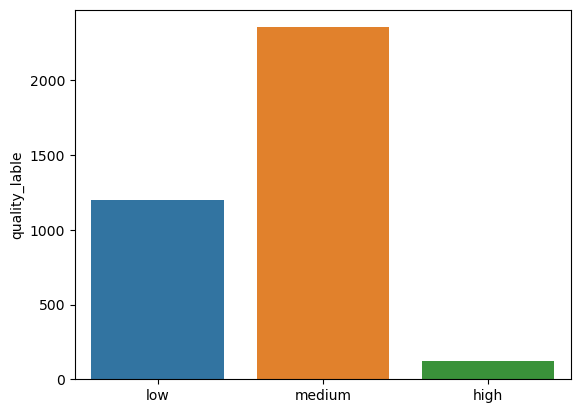

In [11]:
df_w['quality_lable']=df_w['quality'].apply(lambda x : 'low' if x <= 5 else 'medium' if x <= 7 else 'high')
# here we are transforming these labels into categrical data type (specific to pandas) instead of simple st
df_w['quality_lable']=pd.Categorical(df_w['quality_lable'], categories=['low', 'medium', 'high'])
sns.barplot( df_w['quality_lable'].value_counts().index, df_w['quality_lable'].value_counts())
df_w[df_w['quality_lable']== 'high']

<AxesSubplot:>

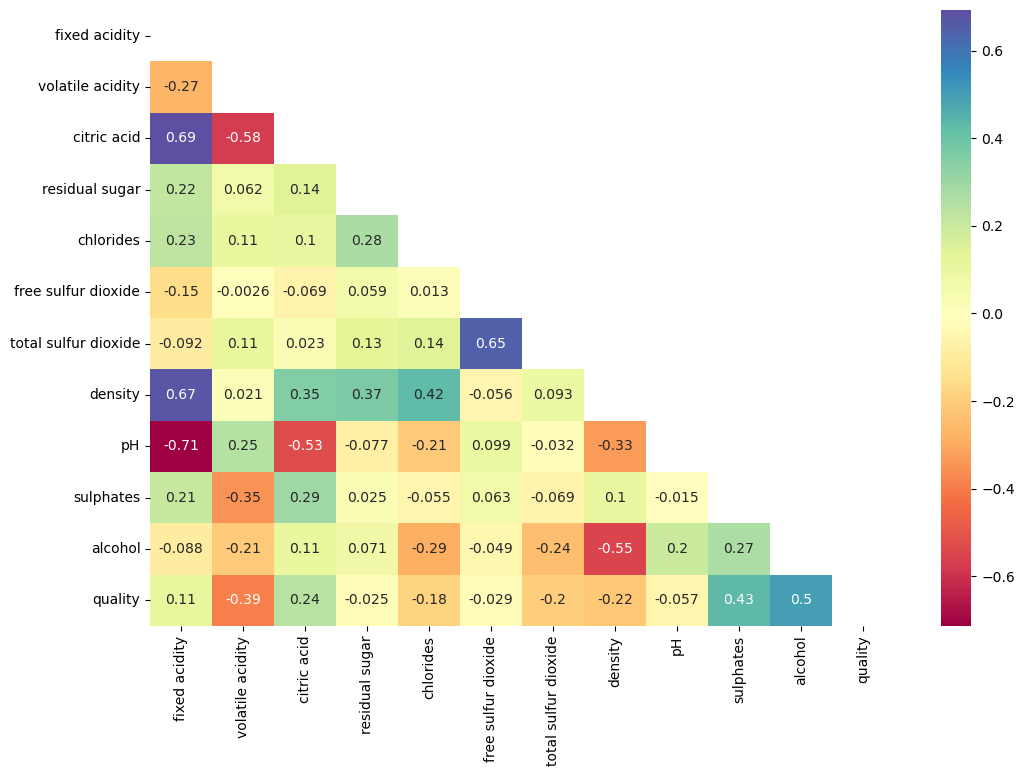

In [19]:
fig=plt.figure(figsize=(12,8))
corr_r=df_r.corr()
mask=np.triu(np.ones_like(corr_r,dtype=bool))
sns.heatmap(corr_r, mask=mask, cmap='Spectral', annot= True)

<AxesSubplot:xlabel='pH', ylabel='fixed acidity'>

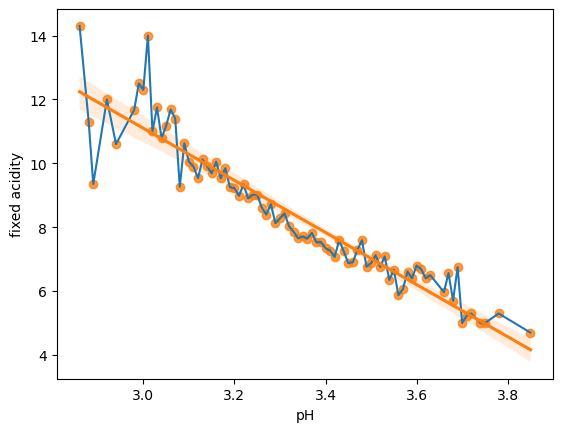

In [28]:
grouped=df_r.groupby('pH')
df_g1=grouped['fixed acidity'].agg(np.mean).reset_index()
sns.lineplot(x='pH', y='fixed acidity', data=df_g1)
sns.regplot(x='pH', y='fixed acidity', data=df_g1)

<AxesSubplot:xlabel='chlorides', ylabel='citric acid'>

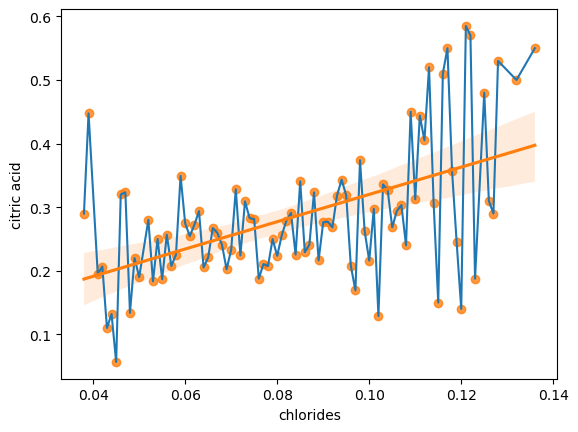

In [32]:
grouped=df_r.groupby('chlorides')
df_g1=grouped['citric acid'].agg(np.mean).reset_index()
sns.lineplot(x='chlorides', y='citric acid', data=df_g1)
sns.regplot(x='chlorides', y='citric acid', data=df_g1)

<AxesSubplot:xlabel='chlorides', ylabel='citric acid'>

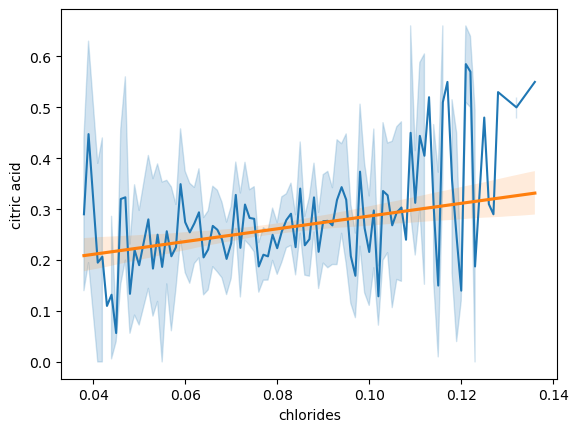

In [92]:
sns.lineplot(x='chlorides', y='citric acid', data=df_r)
sns.regplot(x='chlorides', y='citric acid', data=df_r, scatter=False)

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='volatile acidity'>

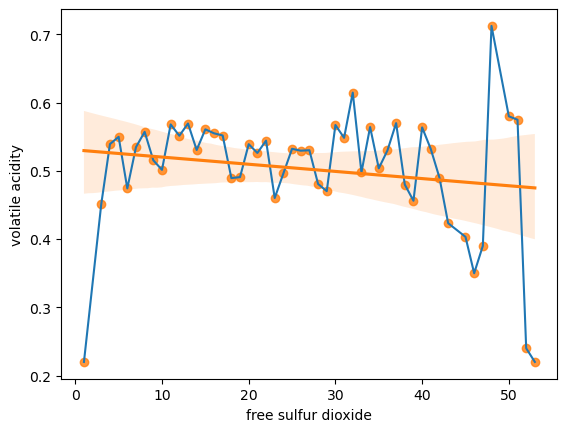

In [33]:
grouped=df_r.groupby('free sulfur dioxide')
df_g1=grouped['volatile acidity'].agg(np.mean).reset_index()
sns.lineplot(x='free sulfur dioxide', y='volatile acidity', data=df_g1)
sns.regplot(x='free sulfur dioxide', y='volatile acidity', data=df_g1)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

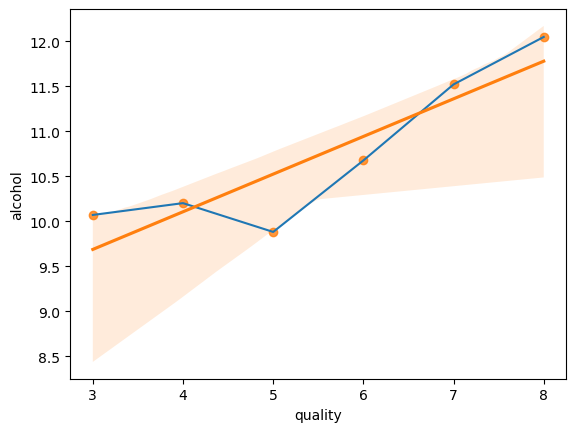

In [43]:
grouped=df_r.groupby('quality')
df_g1=grouped['alcohol'].agg(np.mean).reset_index()
sns.lineplot(x='quality', y='alcohol', data=df_g1)
sns.regplot(x='quality', y='alcohol', data=df_g1)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

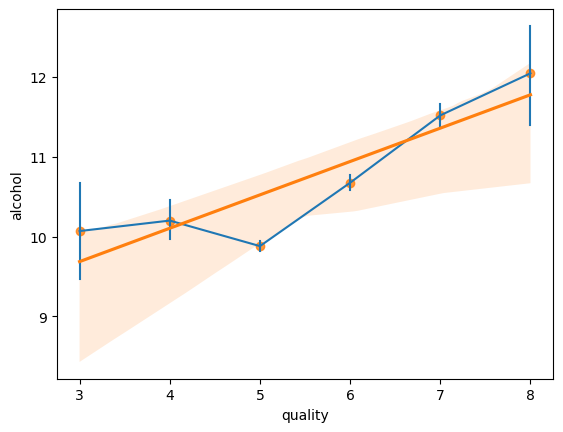

In [81]:
sns.lineplot(x='quality', y='alcohol', data=df_r, err_style='bars',ci=95)
sns.regplot(x='quality', y='alcohol', data=df_g1)

<AxesSubplot:xlabel='alcohol', ylabel='sulphates'>

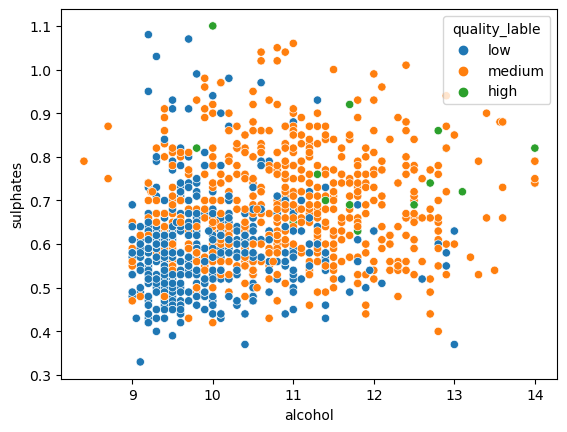

In [56]:
sns.scatterplot(x='alcohol', y='sulphates', data=df_r, hue='quality_lable')

<AxesSubplot:xlabel='alcohol', ylabel='sulphates'>

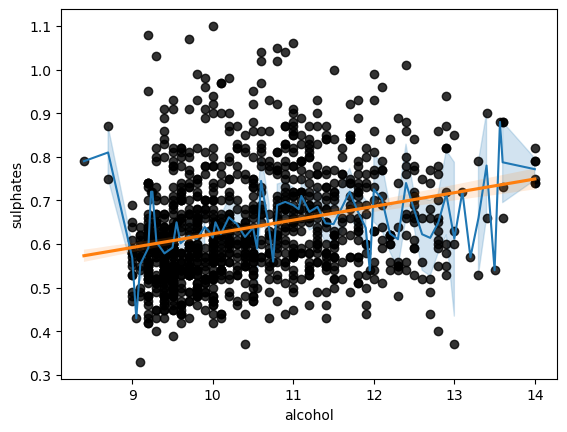

In [82]:
ax=sns.lineplot(x='alcohol', y='sulphates', data=df_r)

sns.regplot(x='alcohol', y='sulphates', data=df_r, scatter_kws={"color": "black"})

<AxesSubplot:xlabel='alcohol', ylabel='sulphates'>

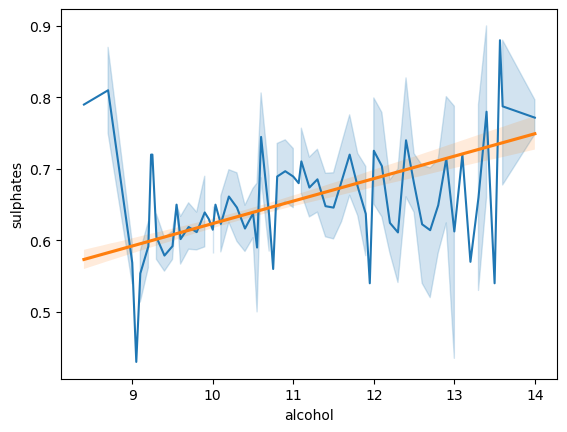

In [90]:
ax=sns.lineplot(x='alcohol', y='sulphates', data=df_r)

sns.regplot(x='alcohol', y='sulphates', data=df_r, scatter_kws={"color": "black"}, scatter=False)


<AxesSubplot:xlabel='citric acid', ylabel='Count'>

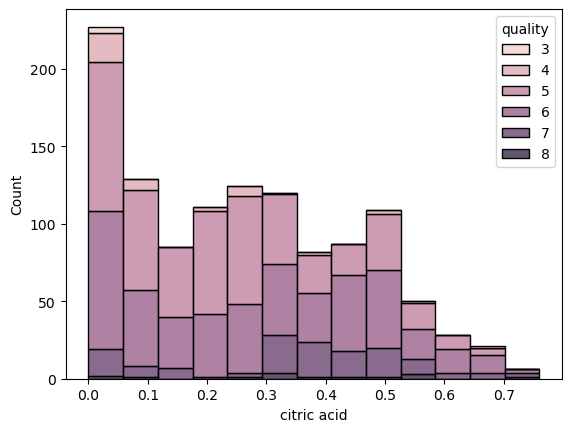

In [67]:
sns.histplot(x='citric acid', hue='quality', data=df_r, multiple="stack")

<AxesSubplot:xlabel='citric acid', ylabel='Count'>

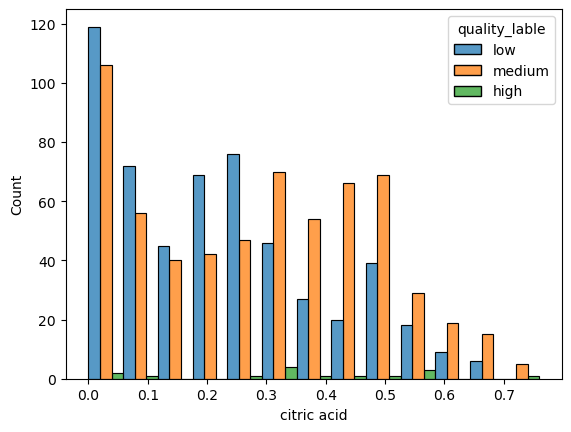

In [69]:
sns.histplot(x='citric acid', hue='quality_lable', data=df_r, multiple="dodge")

In [73]:
from scipy import stats

F, p = stats.f_oneway(df_r[df_r['quality_lable'] == 'low']['alcohol'],
df_r[df_r['quality_lable'] == 'medium']['alcohol'],
df_r[df_r['quality_lable'] == 'high']['alcohol'])
print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean alcohol levels across wine samples with different quality ratings
F Statistic: 174.38834048948837 	p-value: 4.723187408177006e-67


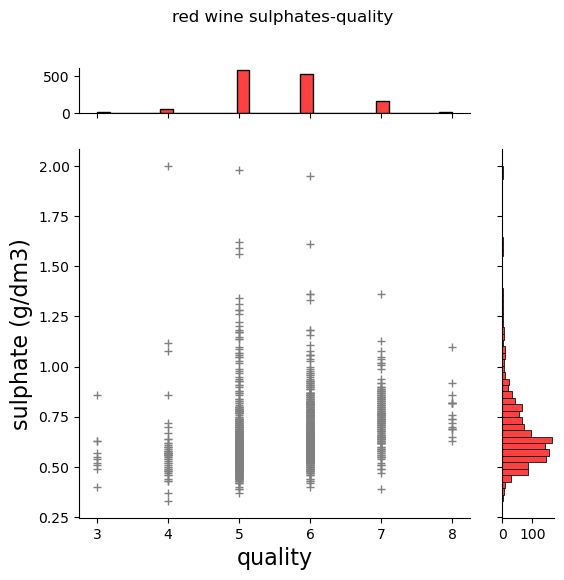

In [140]:

h=sns.jointplot(x='quality', y='sulphates', data=red_wine, color='red',marginal_ticks=True)
h.set_axis_labels('quality', 'sulphate (g/dm3)', fontsize=16)
h.fig.suptitle('red wine sulphates-quality')
h.fig.tight_layout(pad=2)

h.ax_joint.collections[0].set_alpha(0)
h.plot_joint(plt.scatter, c='grey', s=30, linewidth=1, marker='+')



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000
mean,8.264885,0.526014,0.260017,2.255004,0.078868,15.688719,45.085242,0.996582,3.318321,0.637303,10.436768,5.636132
std,1.673991,0.177020,0.189710,0.545234,0.015833,9.691890,30.244304,0.001772,0.146797,0.124200,1.064111,0.800520
min,4.700000,0.120000,0.000000,0.900000,0.038000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.069000,8.000000,22.000000,0.995500,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.240000,2.200000,0.078000,14.000000,37.000000,0.996600,3.320000,0.610000,10.200000,6.000000
75%,9.150000,0.640000,0.410000,2.500000,0.088000,21.000000,60.000000,0.997690,3.410000,0.710000,11.100000,6.000000
max,14.300000,1.240000,0.760000,4.300000,0.136000,53.000000,152.000000,1.002100,3.850000,1.100000,14.000000,8.000000


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

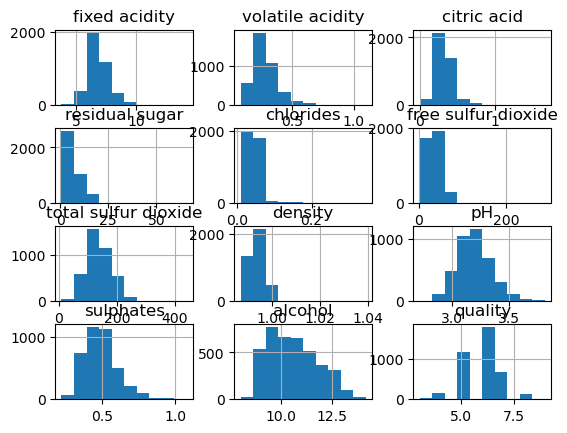

In [141]:
white_wine.hist()

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

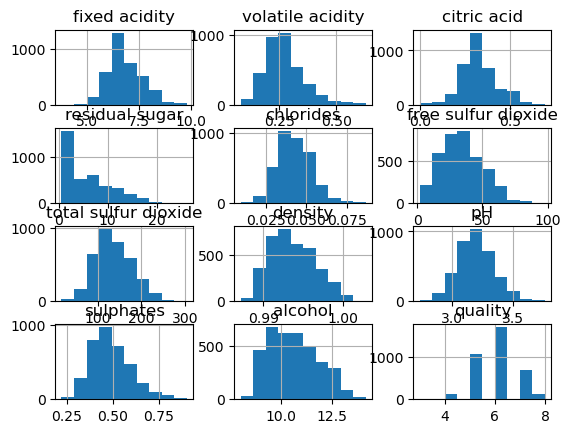

In [142]:
df_w.hist()

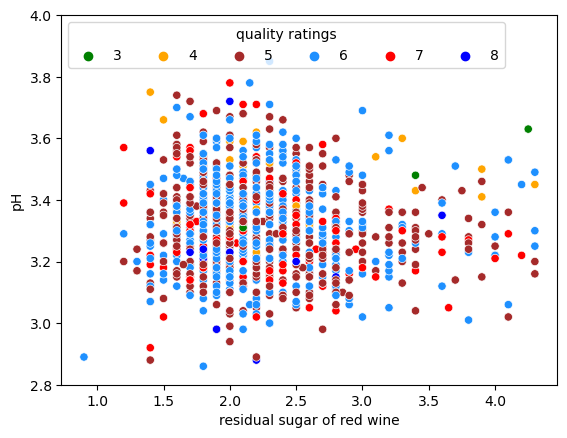

In [162]:
sns.scatterplot(x='residual sugar', y='pH', data=df_r,  hue='quality', palette=['green','orange','brown','dodgerblue','red', 'blue'])
plt.xlabel('residual sugar of red wine')
plt.ylim(2.8,4)
plt.ylabel('pH')
plt.legend(loc="upper left", ncol=6, title='quality ratings')


<AxesSubplot:xlabel='density', ylabel='chlorides'>

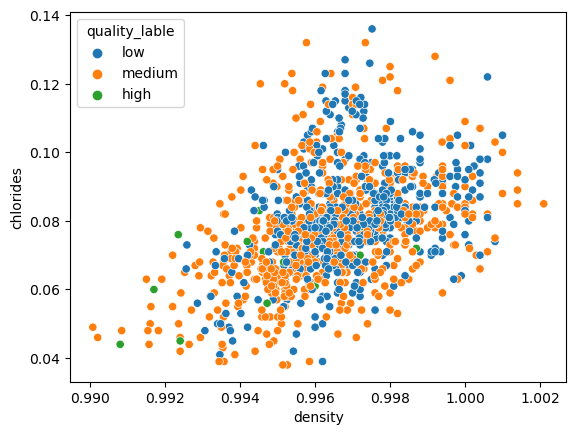

In [167]:
sns.scatterplot(x='density', y='chlorides', data=df_r, hue='quality_lable')


In [172]:
df_r.shape[1]

13

In [173]:
df_r.sulphates

0       0.56
1       0.68
2       0.65
3       0.58
5       0.56
        ... 
1593    0.82
1594    0.58
1595    0.76
1597    0.71
1598    0.66
Name: sulphates, Length: 1179, dtype: float64

In [174]:
df_r[['quality','density','pH']]

,quality,density,pH
0,5,0.99780,3.51
1,5,0.99680,3.20
2,5,0.99700,3.26
3,6,0.99800,3.16
5,5,0.99780,3.51
...,...,...,...
1593,6,0.99651,3.42
1594,5,0.99490,3.45
1595,6,0.99512,3.52
1597,5,0.99547,3.57
